Dataset Shape : (569, 30)
Classes : [0 1]

===== Linear SVM =====
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


===== RBF Kernel SVM =====
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Cross Validation Accuracy : 0.9802197802197803


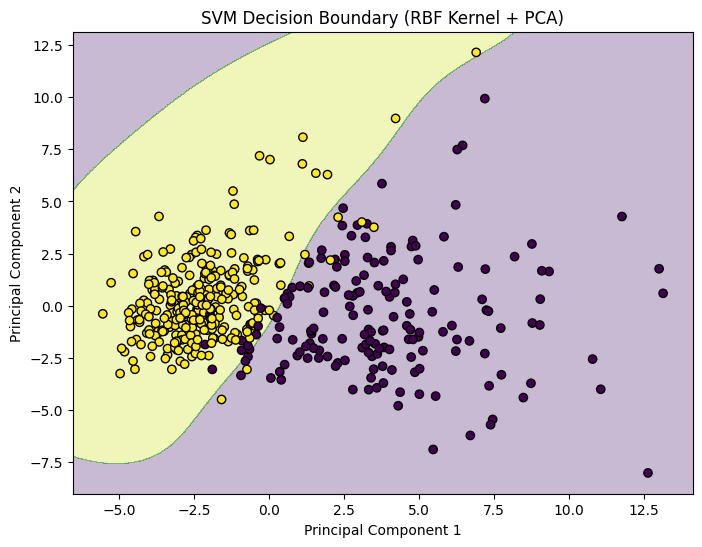


Confusion Matrix
[[41  1]
 [ 1 71]]


In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 2 : Load Dataset (Binary Classification)

data = load_breast_cancer()

X = data.data
y = data.target

print("Dataset Shape :", X.shape)
print("Classes :", np.unique(y))


# Step 3 : Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Step 4 : Feature Scaling (Important for SVM)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 5 : Train Linear Kernel SVM

linear_svm = SVC(kernel='linear', C=1)

linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)

print("\n===== Linear SVM =====")

print("Accuracy:",
      accuracy_score(y_test, y_pred_linear))

print(classification_report(
    y_test,
    y_pred_linear
))


# Step 6 : Train Non-Linear SVM (RBF Kernel)

rbf_svm = SVC(kernel='rbf',
              C=1,
              gamma='scale')

rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)

print("\n===== RBF Kernel SVM =====")

print("Accuracy:",
      accuracy_score(y_test, y_pred_rbf))

print(classification_report(
    y_test,
    y_pred_rbf
))


# Step 7 : Hyperparameter Tuning (C and Gamma)

param_grid = {

    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf']

}

grid = GridSearchCV(
    SVC(),
    param_grid,
    refit=True,
    verbose=1,
    cv=5
)

grid.fit(X_train, y_train)

print("\nBest Parameters :", grid.best_params_)


# Step 8 : Cross Validation Score

scores = cross_val_score(
    grid.best_estimator_,
    X_train,
    y_train,
    cv=5
)

print("Cross Validation Accuracy :",
      scores.mean())


# Step 9 : Decision Boundary Visualization
# (Using PCA -> Reduce to 2D)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_train)


# Train SVM on PCA data

svm_vis = SVC(kernel='rbf', C=1)

svm_vis.fit(X_pca, y_train)


# Create Mesh Grid

x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1

xx, yy = np.meshgrid(

    np.arange(x_min,x_max,0.02),
    np.arange(y_min,y_max,0.02)

)

Z = svm_vis.predict(
    np.c_[xx.ravel(), yy.ravel()]
)

Z = Z.reshape(xx.shape)


# Plot Decision Boundary

plt.figure(figsize=(8,6))

plt.contourf(xx,yy,Z,alpha=0.3)

plt.scatter(

    X_pca[:,0],
    X_pca[:,1],
    c=y_train,
    edgecolors='k'

)

plt.title("SVM Decision Boundary (RBF Kernel + PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()


# Step 10 : Confusion Matrix

print("\nConfusion Matrix")

print(confusion_matrix(
    y_test,
    y_pred_rbf
))